In [ ]:
import pandas as pd
data = pd.read_csv(r'/content/netflix_reviews.csv', delimiter='\t')

In [ ]:
data.head()

,"reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion"
0,"bda7ad86-3fc5-400a-87a9-4aa10a95b0e3,Emre Kalk..."
1,"4d3c9c6f-30c6-424b-be68-48be2fb2cad8,Nathan St..."
2,"4d00f005-2645-4c34-a4bc-47ba0fe5e7d3,Matt Half..."
3,"c87b71f4-11c6-41a0-ba44-01a36ff5d539,Jerry,I c..."
4,"3a23784a-b9e4-432c-920b-346864cd4fe9,Md Robul,..."


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Basic Data Exploration

In [ ]:
data.info()
(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178272 entries, 0 to 178271
Data columns (total 1 columns):
 #   Column                                                                            Non-Null Count   Dtype 
---  ------                                                                            --------------   ----- 
 0   reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion  178272 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


,"reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion"
count,178272
unique,108013
top,"cd22381f-7727-42cc-a86e-8e4c284e4ac6,Dennis Wa..."
freq,3


User Sentiment Analysis

In [ ]:
# Upgrade Seaborn to the latest version
!pip install --upgrade seaborn

# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
print(type(data))

<class 'ellipsis'>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/netflix_reviews.csv')

In [ ]:
df.head(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,bda7ad86-3fc5-400a-87a9-4aa10a95b0e3,Emre Kalkan,"To get 5 star review, pleade add your device t...",1,0,8.113.3 build 31 50678,2024-05-11 23:39:35,8.113.3 build 31 50678
1,4d3c9c6f-30c6-424b-be68-48be2fb2cad8,Nathan String,vary good,5,0,8.113.3 build 31 50678,2024-05-11 23:35:40,8.113.3 build 31 50678
2,4d00f005-2645-4c34-a4bc-47ba0fe5e7d3,Matt Halfaf,"""Are you still watching ___? Press play to con...",1,0,8.113.3 build 31 50678,2024-05-11 23:23:30,8.113.3 build 31 50678
3,c87b71f4-11c6-41a0-ba44-01a36ff5d539,Jerry,I can't go any lower than one star rating and ...,1,0,8.113.3 build 31 50678,2024-05-11 22:25:54,8.113.3 build 31 50678
4,3a23784a-b9e4-432c-920b-346864cd4fe9,Md Robul,Good App,5,0,8.113.3 build 31 50678,2024-05-11 21:59:56,8.113.3 build 31 50678


In [ ]:
# Set red color shades
red_palette = sns.color_palette("Reds", 10)

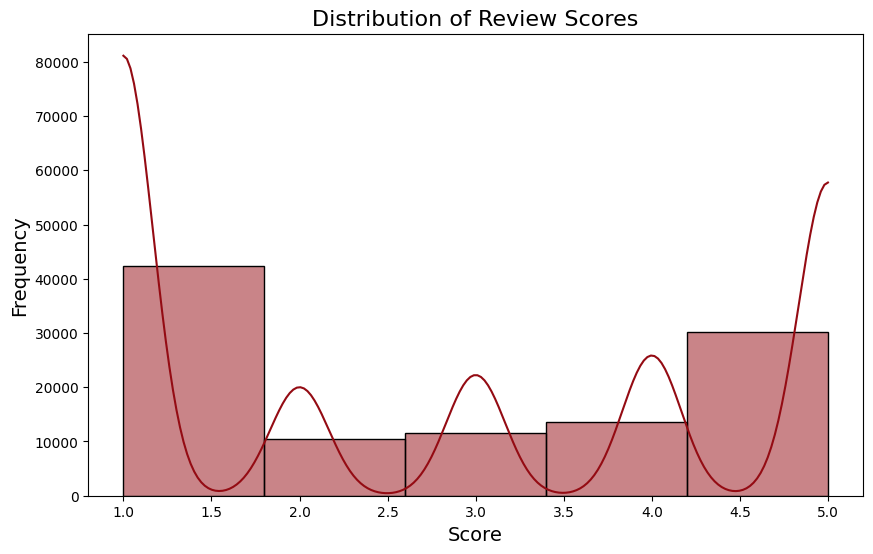

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=5, kde=True, color=red_palette[-1])
plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

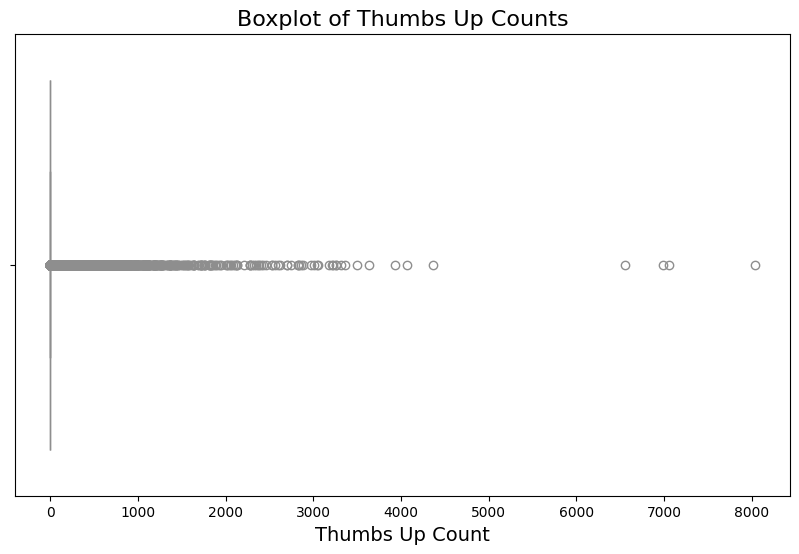

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['thumbsUpCount'], color=red_palette[0])
plt.title('Boxplot of Thumbs Up Counts', fontsize=16)
plt.xlabel('Thumbs Up Count', fontsize=14)
plt.show()

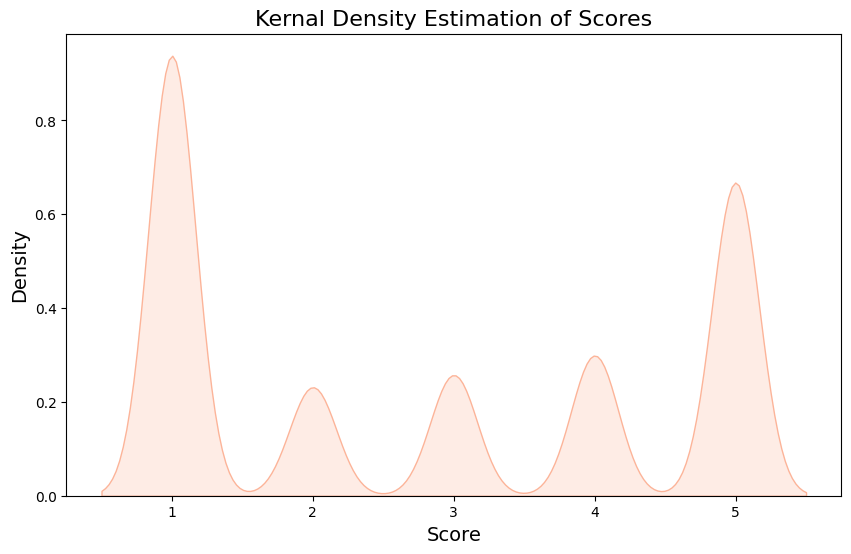

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['score'], shade=True, color=red_palette[2])
plt.title('Kernal Density Estimation of Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

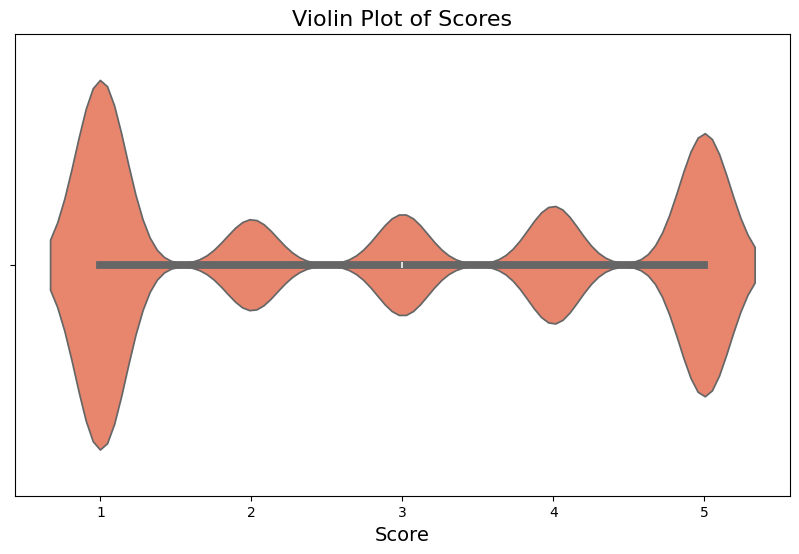

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['score'], color=red_palette[4])
plt.title('Violin Plot of Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.show()

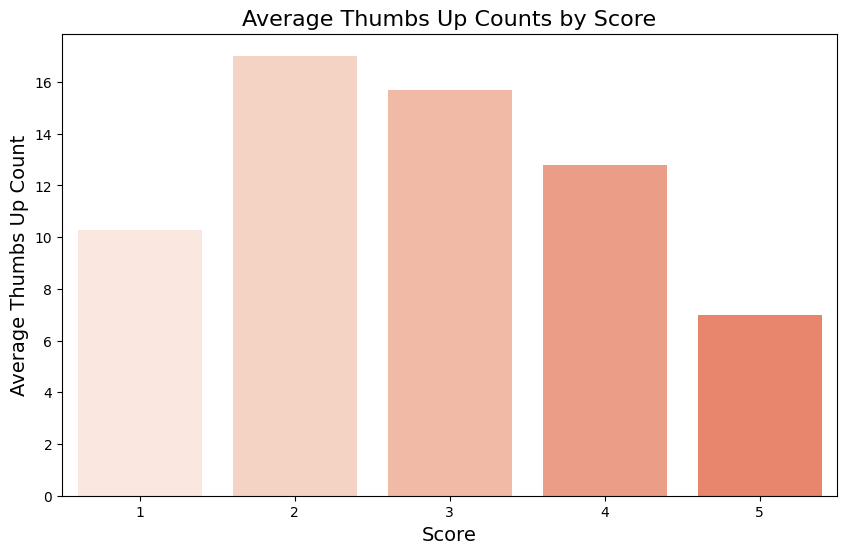

In [ ]:
avg_thumbs_up = df.groupby('score')['thumbsUpCount'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='thumbsUpCount', data = avg_thumbs_up, palette=red_palette)
plt.title('Average Thumbs Up Counts by Score', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Average Thumbs Up Count', fontsize=14)
plt.show()

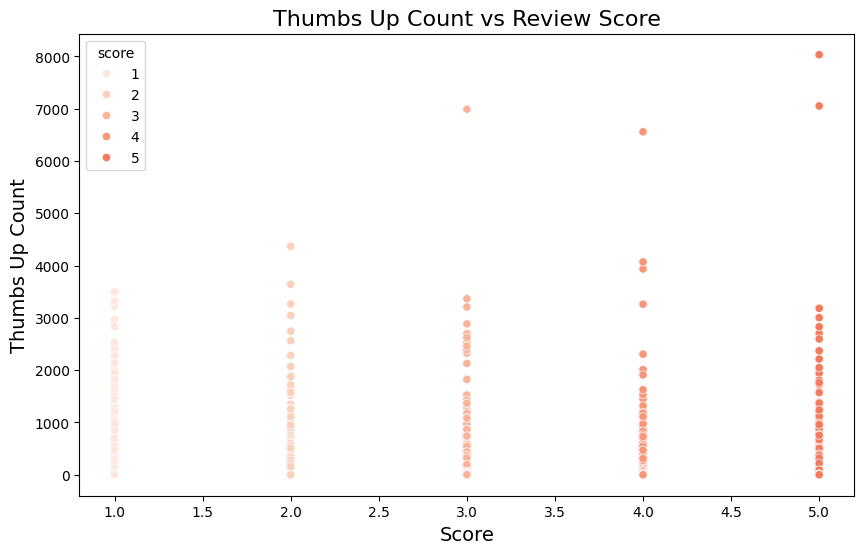

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='thumbsUpCount', data=df, hue='score', palette=red_palette)
plt.title('Thumbs Up Count vs Review Score', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Thumbs Up Count', fontsize=14)
plt.show()

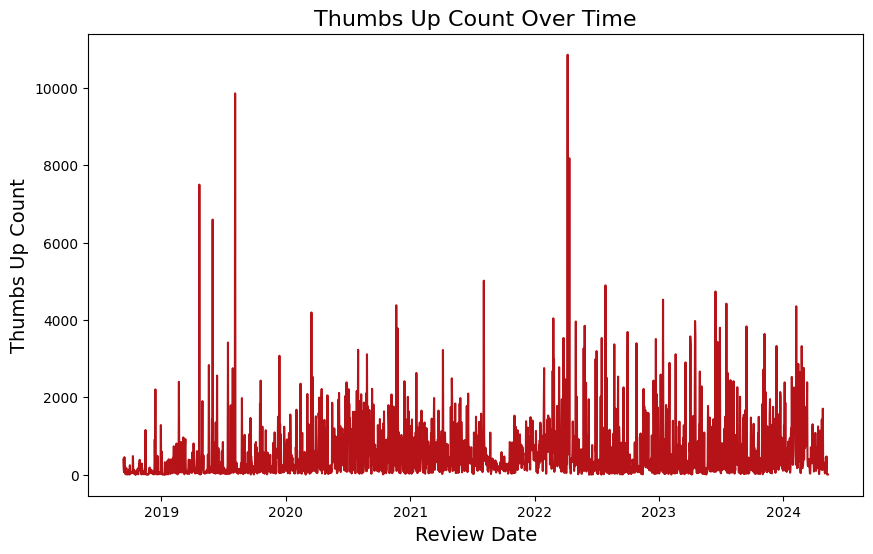

In [ ]:
df['review_date'] = pd.to_datetime(df['at'])
df['review_date'] = df['review_date'].dt.date
thumbs_up_over_time = df.groupby('review_date')['thumbsUpCount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='review_date', y='thumbsUpCount', data=thumbs_up_over_time, color = red_palette[8])
plt.title('Thumbs Up Count Over Time', fontsize=16)
plt.xlabel('Review Date', fontsize=14)
plt.ylabel('Thumbs Up Count', fontsize=14)
plt.show()

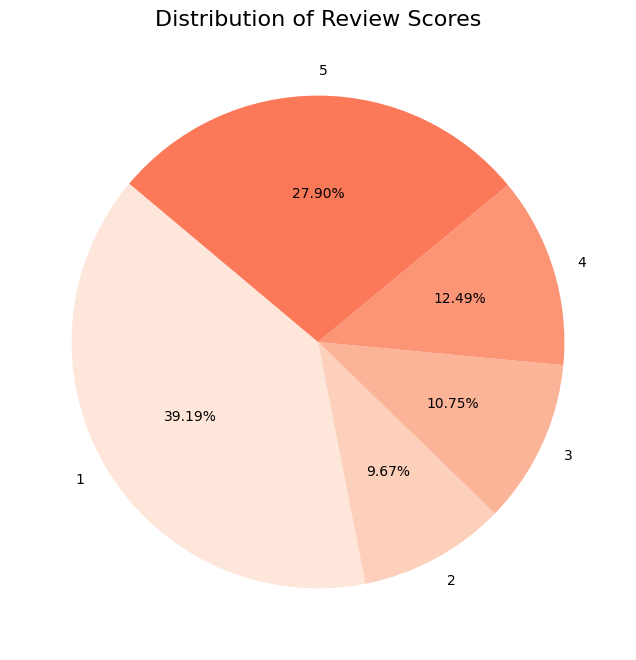

In [ ]:
score_counts = df['score'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.2f%%', startangle=140, colors=red_palette)
plt.title('Distribution of Review Scores', fontsize=16)
plt.show()

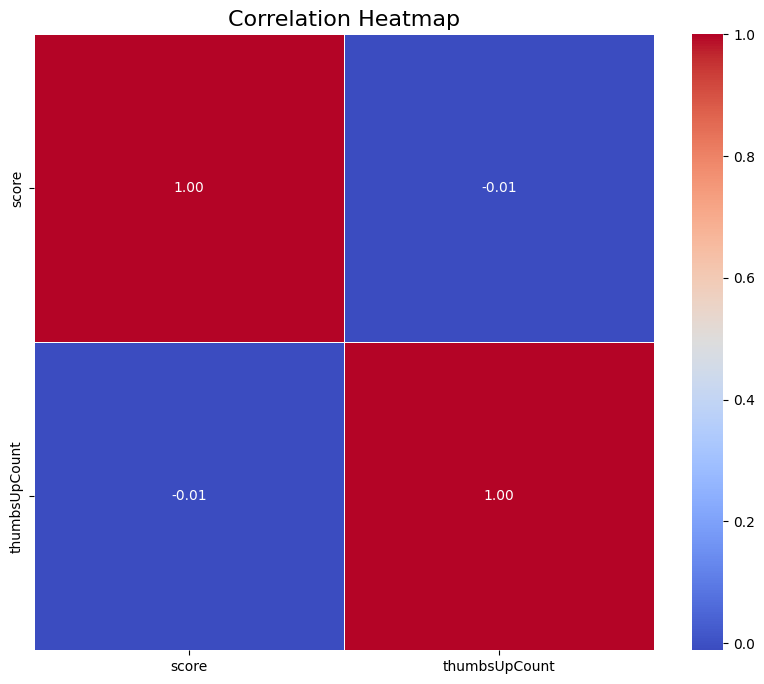

In [ ]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()